In [2]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

#!dir

#Loading 3 databases from CSV files

duckdb.sql ("DROP TABLE IF EXISTS flights_info")
duckdb.sql ("DROP TABLE IF EXISTS airports_info")
duckdb.sql ("DROP TABLE IF EXISTS airlines_info")

duckdb.sql ( 'CREATE TABLE flights_info AS SELECT * FROM "flights.csv"')
duckdb.sql ( 'CREATE TABLE airports_info AS SELECT * FROM "airports.csv"')
duckdb.sql ( 'CREATE TABLE airlines_info AS SELECT * FROM "airlines.csv"')


In [3]:
#Creating Flights_Delay table using the new schema - Departure|Arrival|Carrier|CarrierName|DepDelay|ArrDelay 
#where Departure and Arrival maps the City name 

duckdb.sql ("DROP TABLE IF EXISTS Flights_Delay")

duckdb.sql (''' CREATE TABLE Flights_Delay AS SELECT 
            a1.City AS Departure,
            a2.City AS Arrival,
            f.Carrier,
            a3.Description AS CarrierName,
            f.DepDelay,
            f.ArrDelay
                  
FROM flights_info f

JOIN 
    airports_info a1 ON f.OriginAirportID = a1.airport_id
JOIN
    airports_info a2 ON f.DestAirportID = a2.airport_id

JOIN 
   airlines_info a3 ON f.Carrier = a3.Code
''')





In [4]:
duckdb.sql ('SELECT * FROM  Flights_Delay')

┌────────────────┬────────────────┬─────────┬──────────────────────────┬──────────┬──────────┐
│   Departure    │    Arrival     │ Carrier │       CarrierName        │ DepDelay │ ArrDelay │
│    varchar     │    varchar     │ varchar │         varchar          │  int64   │  int64   │
├────────────────┼────────────────┼─────────┼──────────────────────────┼──────────┼──────────┤
│ Milwaukee      │ Newark         │ EV      │ ExpressJet Airlines Inc. │      134 │      143 │
│ Milwaukee      │ Newark         │ EV      │ ExpressJet Airlines Inc. │      -10 │       11 │
│ Milwaukee      │ Newark         │ EV      │ ExpressJet Airlines Inc. │      -11 │      -21 │
│ Milwaukee      │ Newark         │ EV      │ ExpressJet Airlines Inc. │       -4 │      -18 │
│ Milwaukee      │ Newark         │ EV      │ ExpressJet Airlines Inc. │      -10 │      -31 │
│ Milwaukee      │ Newark         │ EV      │ ExpressJet Airlines Inc. │       -1 │      -10 │
│ Milwaukee      │ Newark         │ EV      │ Expr

In [5]:
#Which airline has the largest number of departure delay flights ?

duckdb.sql (''' 
SELECT 
      f1.Carrier,
      f1.CarrierName,
      COUNT ( DepDelay ) AS Count_Dep_Delay
      
FROM Flights_Delay f1     

       GROUP BY f1.CarrierName,
       f1.Carrier
       ORDER BY Count_Dep_Delay DESC
''')

┌─────────┬─────────────────────────────┬─────────────────┐
│ Carrier │         CarrierName         │ Count_Dep_Delay │
│ varchar │           varchar           │      int64      │
├─────────┼─────────────────────────────┼─────────────────┤
│ WN      │ Southwest Airlines Co.      │          575739 │
│ DL      │ Delta Air Lines Inc.        │          381657 │
│ AA      │ American Airlines Inc.      │          289855 │
│ UA      │ United Air Lines Inc.       │          286418 │
│ US      │ US Airways Inc.             │          233321 │
│ OO      │ SkyWest Airlines Inc.       │          160164 │
│ EV      │ ExpressJet Airlines Inc.    │          157928 │
│ B6      │ JetBlue Airways             │          121906 │
│ MQ      │ Envoy Air                   │          113212 │
│ FL      │ AirTran Airways Corporation │           92702 │
│ 9E      │ Endeavor Air Inc.           │           80031 │
│ AS      │ Alaska Airlines Inc.        │           68555 │
│ YV      │ Mesa Airlines Inc.          

In [6]:
#Which airline has the largest average arrival delay ?

duckdb.sql ("DROP TABLE IF EXISTS Avg_Arrival")
duckdb.sql (''' CREATE TABLE Avg_Arrival AS SELECT 
      f1.Carrier,
      f1.CarrierName, 
      AVG (ArrDelay) AS AVG_Arrival_Delay,
      COUNT (ArrDelay) AS Count_Arrival_Delay 
      
FROM 
       Flights_Delay f1
       
       GROUP BY f1.CarrierName,
       f1.Carrier
       ORDER BY AVG_Arrival_Delay DESC
        
''')

duckdb.sql ('SELECT * FROM Avg_Arrival')

┌─────────┬─────────────────────────────┬──────────────────────┬─────────────────────┐
│ Carrier │         CarrierName         │  AVG_Arrival_Delay   │ Count_Arrival_Delay │
│ varchar │           varchar           │        double        │        int64        │
├─────────┼─────────────────────────────┼──────────────────────┼─────────────────────┤
│ MQ      │ Envoy Air                   │   13.731132742112143 │              113212 │
│ F9      │ Frontier Airlines Inc.      │   12.848704460238402 │               35738 │
│ EV      │ ExpressJet Airlines Inc.    │   10.205865964236867 │              157928 │
│ VX      │ Virgin America              │     9.65790609977259 │               34739 │
│ B6      │ JetBlue Airways             │    9.634792381014881 │              121906 │
│ YV      │ Mesa Airlines Inc.          │    8.547585240718654 │               52821 │
│ WN      │ Southwest Airlines Co.      │    8.313306897743596 │              575739 │
│ FL      │ AirTran Airways Corporation │  

In [7]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

flight_df = duckdb.sql('SELECT * FROM Avg_Arrival')
print(flight_df)

┌─────────┬─────────────────────────────┬──────────────────────┬─────────────────────┐
│ Carrier │         CarrierName         │  AVG_Arrival_Delay   │ Count_Arrival_Delay │
│ varchar │           varchar           │        double        │        int64        │
├─────────┼─────────────────────────────┼──────────────────────┼─────────────────────┤
│ MQ      │ Envoy Air                   │   13.731132742112143 │              113212 │
│ F9      │ Frontier Airlines Inc.      │   12.848704460238402 │               35738 │
│ EV      │ ExpressJet Airlines Inc.    │   10.205865964236867 │              157928 │
│ VX      │ Virgin America              │     9.65790609977259 │               34739 │
│ B6      │ JetBlue Airways             │    9.634792381014881 │              121906 │
│ YV      │ Mesa Airlines Inc.          │    8.547585240718654 │               52821 │
│ WN      │ Southwest Airlines Co.      │    8.313306897743596 │              575739 │
│ FL      │ AirTran Airways Corporation │  

In [37]:
#Plot a bar graph to show the value counts of positive DepDelay for each 
#CarrierName where x-axis is CarrierName and y-axis is value counts

duckdb.sql ("DROP TABLE IF EXISTS DepDelay_Graph")

duckdb.sql(''' CREATE TABLE DepDelay_Graph AS 
    SELECT
    CarrierName,
    SUM(CASE WHEN DepDelay > 0 THEN 1 ELSE 0 END) AS DelayCount
    FROM 
    Flights_Delay 
    GROUP BY 
    CarrierName
    ORDER BY DelayCount DESC
''')
    
duckdb.sql("SELECT * FROM DepDelay_Graph")

┌─────────────────────────────┬────────────┐
│         CarrierName         │ DelayCount │
│           varchar           │   int128   │
├─────────────────────────────┼────────────┤
│ Southwest Airlines Co.      │     341822 │
│ United Air Lines Inc.       │     133146 │
│ American Airlines Inc.      │     126318 │
│ Delta Air Lines Inc.        │     119574 │
│ US Airways Inc.             │      68636 │
│ ExpressJet Airlines Inc.    │      59554 │
│ SkyWest Airlines Inc.       │      50467 │
│ JetBlue Airways             │      46491 │
│ Envoy Air                   │      45372 │
│ AirTran Airways Corporation │      41588 │
│ Endeavor Air Inc.           │      23391 │
│ Frontier Airlines Inc.      │      16858 │
│ Mesa Airlines Inc.          │      16584 │
│ Alaska Airlines Inc.        │      15372 │
│ Virgin America              │      14162 │
│ Hawaiian Airlines Inc.      │       4163 │
├─────────────────────────────┴────────────┤
│ 16 rows                        2 columns │
└─────────

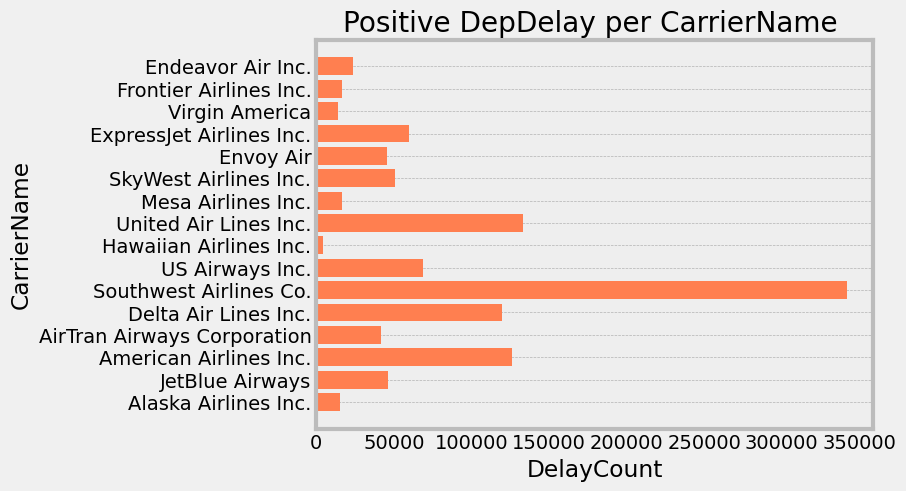

<Figure size 640x480 with 0 Axes>

In [36]:
import duckdb
import matplotlib.pyplot as plt
from matplotlib import style

style.use("bmh")

DepDelay = duckdb.sql('SELECT * FROM DepDelay_Graph').fetchdf()

plt.barh(DepDelay['CarrierName'], DepDelay['DelayCount'],color = "coral")
plt.title("Positive DepDelay per CarrierName ")
plt.xlabel("DelayCount")
plt.ylabel("CarrierName")
plt.grid(axis='x')


plt.show()

plt.savefig('bar.png',dpi=300)

In [39]:
#Plot a scatter graph to show the relationship between DepDelay and ArrDelay

duckdb.sql ("DROP TABLE IF EXISTS ScatterPlot_Delay")

duckdb.sql (''' CREATE TABLE ScatterPlot_Delay AS SELECT 
            DepDelay, 
            ArrDelay,
            CarrierName
            FROM Flights_Delay              
''')

duckdb.sql ("SELECT * FROM ScatterPlot_Delay")


┌──────────┬──────────┬──────────────────────────┐
│ DepDelay │ ArrDelay │       CarrierName        │
│  int64   │  int64   │         varchar          │
├──────────┼──────────┼──────────────────────────┤
│      134 │      143 │ ExpressJet Airlines Inc. │
│      -10 │       11 │ ExpressJet Airlines Inc. │
│      -11 │      -21 │ ExpressJet Airlines Inc. │
│       -4 │      -18 │ ExpressJet Airlines Inc. │
│      -10 │      -31 │ ExpressJet Airlines Inc. │
│       -1 │      -10 │ ExpressJet Airlines Inc. │
│       -2 │      -10 │ ExpressJet Airlines Inc. │
│        1 │      -14 │ ExpressJet Airlines Inc. │
│       57 │       60 │ ExpressJet Airlines Inc. │
│       -1 │        5 │ ExpressJet Airlines Inc. │
│        · │        · │           ·              │
│        · │        · │           ·              │
│        · │        · │           ·              │
│       -4 │        9 │ Frontier Airlines Inc.   │
│      118 │      106 │ Frontier Airlines Inc.   │
│       97 │       89 │ Frontie

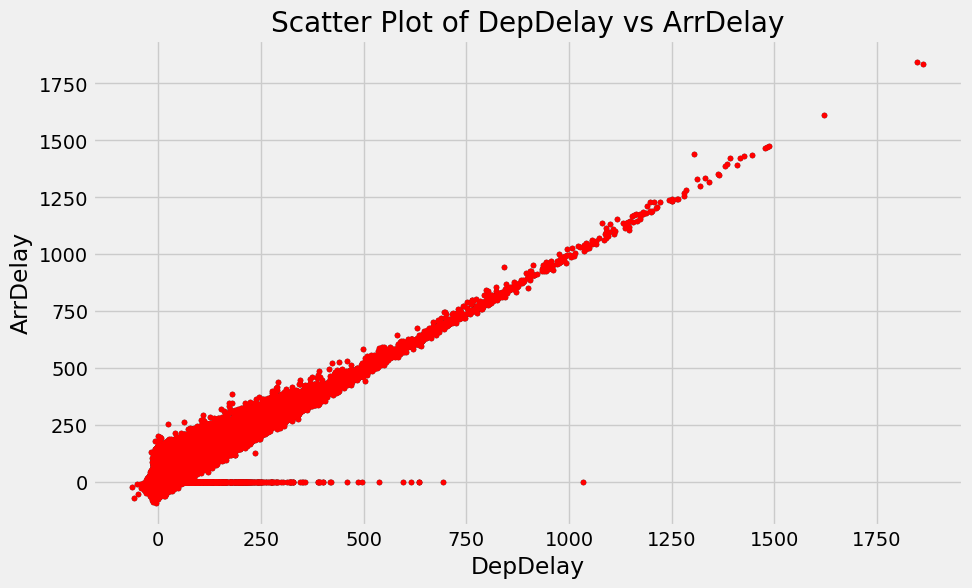

<Figure size 640x480 with 0 Axes>

In [42]:
import duckdb
import matplotlib.pyplot as plt
from matplotlib import style

style.use("fivethirtyeight")
plt.figure(figsize=(10, 6))

ScatterPlotDF = duckdb.sql ("SELECT * FROM ScatterPlot_Delay").fetchdf()

plt.plot(ScatterPlotDF['DepDelay'], ScatterPlotDF['ArrDelay'], 'o', markersize=3, color='black', label='DepDelay')
plt.plot(ScatterPlotDF['DepDelay'], ScatterPlotDF['ArrDelay'], 'o', markersize=3, color='red', label='ArrDelay')

plt.xlabel('DepDelay') #independent variable 
plt.ylabel('ArrDelay') #dependent variable 
plt.title('Scatter Plot of DepDelay vs ArrDelay')
plt.grid(True)
plt.show()
plt.savefig('scatter.png',dpi=300)  
